# Supervised case study: Flight dataset

# Problem Statement :
The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. Apply EDA, statistical methods and Machine learning algorithms in order to get meaningful information from it. 

# Dataset Information:
Flight booking price prediction dataset contains around 3 lacs records with 11 attributes - airline,flight,source_city,	departure_time,stops,arrival_time,destination_city,class,duration,days_left,price .

# Importing the required libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset:

In [2]:
flight = pd.read_csv("Flight_Booking.csv")

In [3]:
flight.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# EDA:

In [4]:
#dropping the unnamed column as it is giving the index values only
flight=flight.drop('Unnamed: 0',axis=1)

In [5]:
flight.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
flight.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
60994,Vistara,UK-653,Mumbai,Early_Morning,one,Night,Bangalore,Economy,16.67,46,8867
130891,Vistara,UK-708,Kolkata,Night,one,Evening,Mumbai,Economy,22.67,23,6067
109173,GO_FIRST,G8-283,Bangalore,Early_Morning,one,Afternoon,Kolkata,Economy,8.67,46,5902
62883,Vistara,UK-950,Mumbai,Night,one,Evening,Kolkata,Economy,21.67,10,9879
168756,Air_India,AI-543,Hyderabad,Morning,one,Late_Night,Bangalore,Economy,12.83,32,6314
83698,Indigo,6E-5312,Mumbai,Morning,one,Evening,Chennai,Economy,8.08,47,1890
18231,Air_India,AI-544,Delhi,Evening,one,Morning,Bangalore,Economy,17.50,41,3610
94894,Air_India,AI-505,Bangalore,Morning,one,Night,Mumbai,Economy,11.75,7,9277
7859,GO_FIRST,G8-211,Delhi,Morning,one,Afternoon,Mumbai,Economy,6.75,39,6089
145977,Indigo,6E-417,Kolkata,Afternoon,one,Night,Hyderabad,Economy,5.92,32,4489


In [7]:
flight.columns #columns of the dataset

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [8]:
flight.shape #shape of the dataset

(184023, 11)

In [9]:
flight.info() #info of the dataset:null values and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184023 entries, 0 to 184022
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           184023 non-null  object 
 1   flight            184023 non-null  object 
 2   source_city       184023 non-null  object 
 3   departure_time    184023 non-null  object 
 4   stops             184023 non-null  object 
 5   arrival_time      184023 non-null  object 
 6   destination_city  184023 non-null  object 
 7   class             184023 non-null  object 
 8   duration          184023 non-null  float64
 9   days_left         184023 non-null  int64  
 10  price             184023 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 15.4+ MB


In [10]:
df = flight # renaming the dataset for easiness

In [11]:
df.describe() #summary of the numerical columns

,duration,days_left,price
count,184023.000000,184023.000000,184023.000000
mean,11.445918,25.899882,6586.746157
std,7.165761,13.529114,3682.529843
min,0.830000,1.000000,4.000000
25%,6.170000,15.000000,4190.000000
50%,10.170000,26.000000,5818.000000
75%,15.170000,38.000000,7763.000000
max,47.750000,49.000000,40354.000000


ANALYSIS : 
1. There is almost zero difference in the mean and median of duration and days_left columns so there are no outliers and the data is normally distributed.
2. There is large diff between mean and median of price column (mean>median) so there are outliers. Also mean -median is positive therefore it is right sckewed distribution.

In [12]:
df.describe(include='all') #summary of all the columns

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,184023,184023,184023,184023,184023,184023,184023,184023,184023.000000,184023.000000,184023.000000
unique,6,1480,6,6,3,6,6,1,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Delhi,Economy,NaN,NaN,NaN
freq,58701,1806,43027,42423,148083,55492,37121,184023,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.445918,25.899882,6586.746157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.165761,13.529114,3682.529843
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,4.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.170000,15.000000,4190.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.170000,26.000000,5818.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.170000,38.000000,7763.000000


In [13]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [14]:
df.airline.value_counts()

Vistara      58701
Air_India    42766
Indigo       37280
GO_FIRST     22130
AirAsia      14929
SpiceJet      8217
Name: airline, dtype: int64

In [15]:
df.destination_city.value_counts()

Delhi        37121
Mumbai       33819
Bangalore    30908
Kolkata      29925
Chennai      27210
Hyderabad    25040
Name: destination_city, dtype: int64

In [16]:
df.source_city.nunique()

6

In [17]:
df.source_city.unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [18]:
#checking the null/missing values:
df.isnull().sum()    #there are no null/missing values in the dataset

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [19]:
#checking the duplicate values and adding them 
df.duplicated().sum()  #there are no duplicate values in the dataset

0

# DATA VISUALIZATION:

<AxesSubplot:xlabel='airline', ylabel='price'>

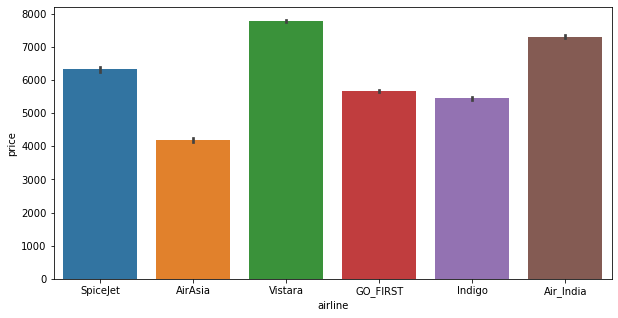

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['airline'],y=df['price'])

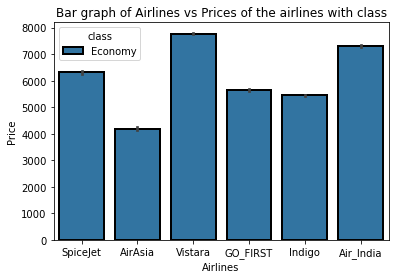

<Figure size 720x720 with 0 Axes>

In [21]:
x= df['airline']
y=df['price']
sns.barplot(x=x,y=y,hue=df['class'],edgecolor='black',linewidth=2)
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.title('Bar graph of Airlines vs Prices of the airlines with class')
plt.figure(figsize=(10,10))
plt.show()

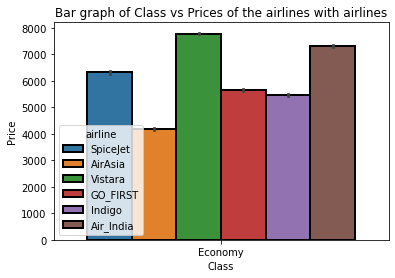

<Figure size 720x720 with 0 Axes>

In [22]:
x= df['class']
y=df['price']
sns.barplot(x=x,y=y,hue=df['airline'],edgecolor='black',linewidth=2)
plt.xlabel('Class')
plt.ylabel('Price')
plt.title('Bar graph of Class vs Prices of the airlines with airlines')
plt.figure(figsize=(10,10))
plt.show()

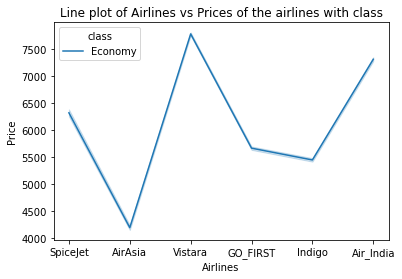

<Figure size 1080x720 with 0 Axes>

In [23]:
x= df['airline']
y=df['price']
sns.lineplot(x=x,y=y,hue=df['class'])
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.title('Line plot of Airlines vs Prices of the airlines with class')
plt.figure(figsize=(15,10))
plt.show()

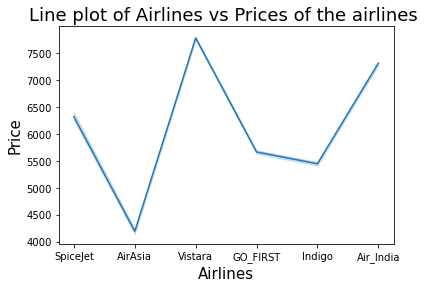

<Figure size 1080x360 with 0 Axes>

In [24]:
x= df['airline']
y=df['price']
sns.lineplot(x=x,y=y)
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('Line plot of Airlines vs Prices of the airlines ',fontsize=18)
plt.figure(figsize=(15,5))
plt.show()

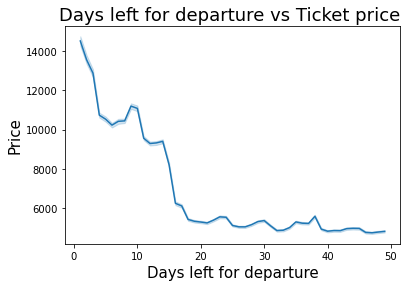

<Figure size 1080x360 with 0 Axes>

In [25]:
x= df['days_left']
y=df['price']
sns.lineplot(x=x,y=y)
plt.xlabel('Days left for departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('Days left for departure vs Ticket price ',fontsize=18)
plt.figure(figsize=(15,5))
plt.show()

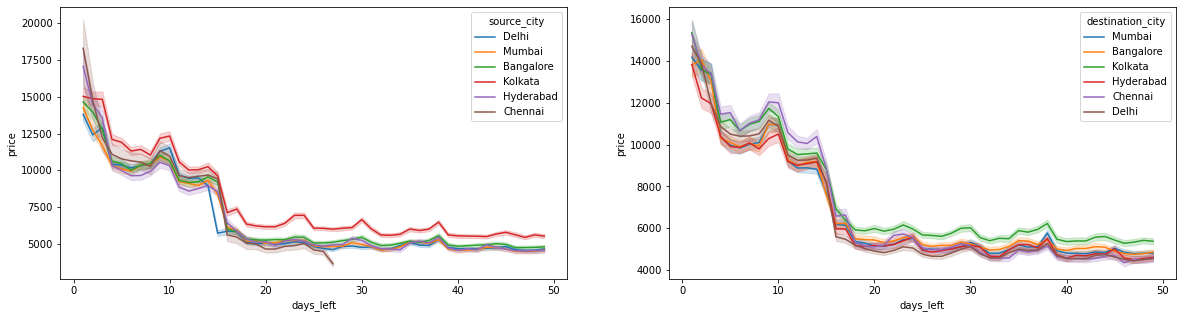

In [26]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.lineplot(x='days_left',y='price',data=df,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df,hue='destination_city',ax=ax[1])
plt.show()

<AxesSubplot:xlabel='source_city', ylabel='price'>

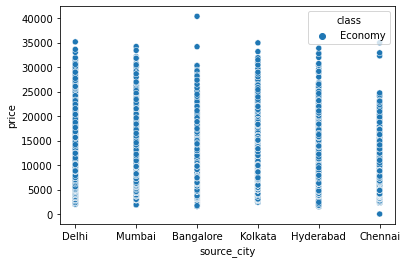

In [27]:
sns.scatterplot(x=df['source_city'],y=df['price'],hue=df['class'])

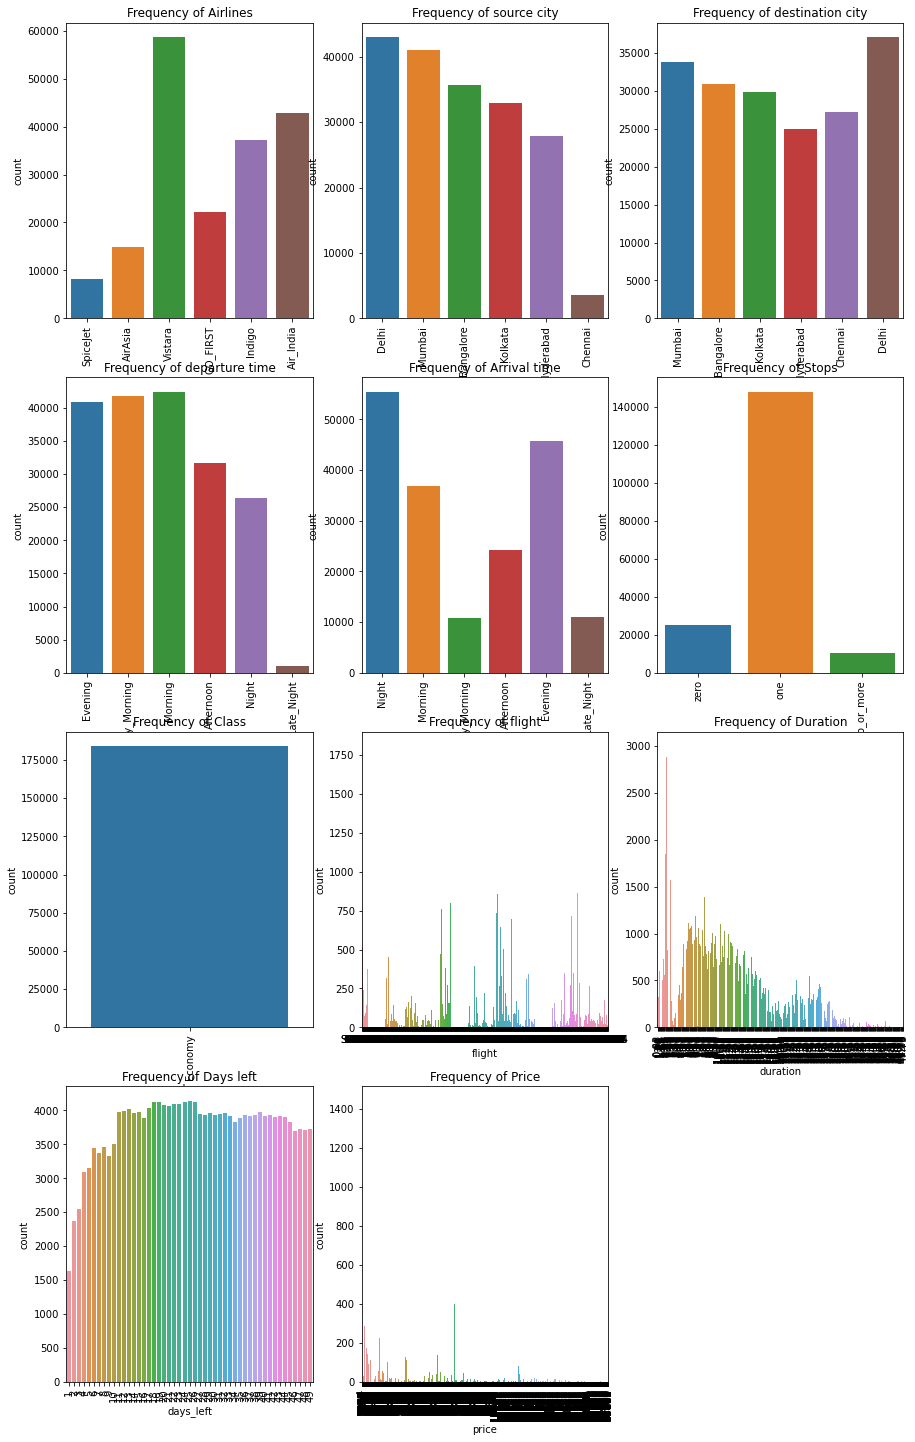

In [28]:
plt.figure(figsize=(15,25))

plt.subplot(4,3,1)
sns.countplot(x=df['airline'],data=df)
plt.title('Frequency of Airlines')
plt.xticks(rotation=90)

plt.subplot(4,3,2)
sns.countplot(x=df['source_city'],data=df)
plt.title('Frequency of source city')
plt.xticks(rotation=90)

plt.subplot(4,3,3)
sns.countplot(x=df['destination_city'],data=df)
plt.title('Frequency of destination city')
plt.xticks(rotation=90)

plt.subplot(4,3,4)
sns.countplot(x=df['departure_time'],data=df)
plt.title('Frequency of departure time')
plt.xticks(rotation=90)

plt.subplot(4,3,5)
sns.countplot(x=df['arrival_time'],data=df)
plt.title('Frequency of Arrival time')
plt.xticks(rotation=90)

plt.subplot(4,3,6)
sns.countplot(x=df['stops'],data=df)
plt.title('Frequency of Stops')
plt.xticks(rotation=90)

plt.subplot(4,3,7)
sns.countplot(x=df['class'],data=df)
plt.title('Frequency of Class')
plt.xticks(rotation=90)

plt.subplot(4,3,8)
sns.countplot(x=df['flight'],data=df)
plt.title('Frequency of flight')

plt.subplot(4,3,9)
sns.countplot(x=df['duration'],data=df)
plt.title('Frequency of Duration')
plt.xticks(rotation=90)

plt.subplot(4,3,10)
sns.countplot(x=df['days_left'],data=df)
plt.title('Frequency of Days left')
plt.xticks(rotation=90)

plt.subplot(4,3,11)
sns.countplot(x=df['price'],data=df)
plt.title('Frequency of Price')
plt.xticks(rotation=90)

plt.show()


In [29]:
df.corr()

,duration,days_left,price
duration,1.000000,-0.043179,0.283049
days_left,-0.043179,1.000000,-0.555854
price,0.283049,-0.555854,1.000000


<AxesSubplot:>

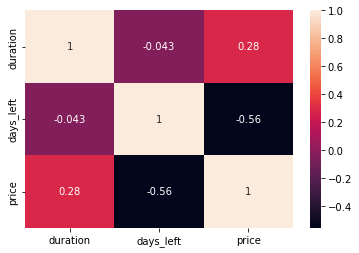

In [30]:
sns.heatmap(df.corr(),annot=True)

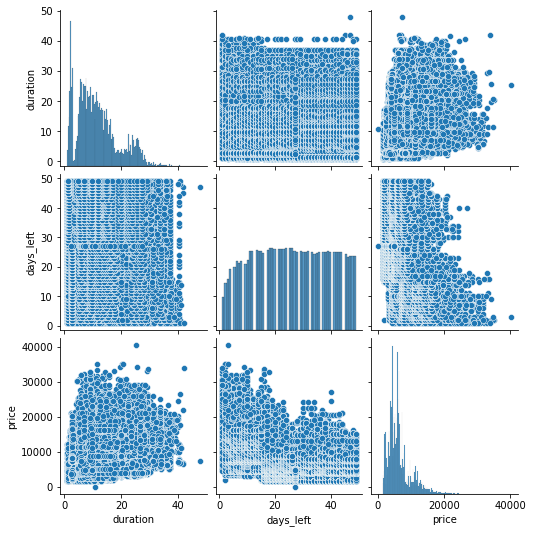

In [31]:
sns.pairplot(data=df)

In [32]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

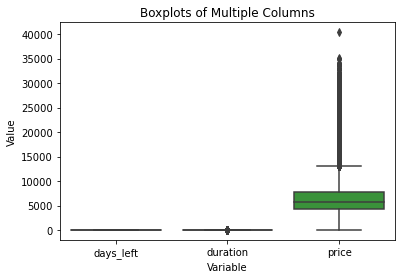

In [33]:
# Specify the columns you want to plot
columns_to_plot = ['airline', 'flight', 'arrival_time','departure_time','stops','days_left','class','duration','price',
                  'source_city','destination_city']


# Create a boxplot for each column using Seaborn
sns.boxplot(data=df[columns_to_plot])

# Add a title and labels to the plot
plt.title('Boxplots of Multiple Columns')
plt.xlabel('Variable')
plt.ylabel('Value')

# Show the plot
plt.show()

# LABEL ENCODING:

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['airline'] =le.fit_transform(df['airline']) 
df['source_city'] =le.fit_transform(df['source_city'])
df['departure_time'] =le.fit_transform(df['departure_time'])
df['stops'] =le.fit_transform(df['stops'])
df['arrival_time'] =le.fit_transform(df['arrival_time'])
df['destination_city'] =le.fit_transform(df['destination_city'])
df['class'] =le.fit_transform(df['class'])
df['flight'] =le.fit_transform(df['flight'])

#le.apply(data=df) -- for the whole dataset
#le=labelencoder()
#for i in df.coumns:
 #   if (df[i].dtype=='object'):
  #     df[i]=le.fit_transform(df[i])

In [35]:
#According to our preference, we can apply label or onehot encoding

In [36]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1327,2,2,2,5,5,0,2.17,1,5953
1,4,1306,2,1,2,4,5,0,2.33,1,5953
2,0,1140,2,1,2,1,5,0,2.17,1,5956
3,5,1478,2,4,2,0,5,0,2.25,1,5955
4,5,1468,2,4,2,4,5,0,2.33,1,5955


In [37]:
df.dtypes

airline               int32
flight                int32
source_city           int32
departure_time        int32
stops                 int32
arrival_time          int32
destination_city      int32
class                 int32
duration            float64
days_left             int64
price                 int64
dtype: object

# Boxplots for various columns:

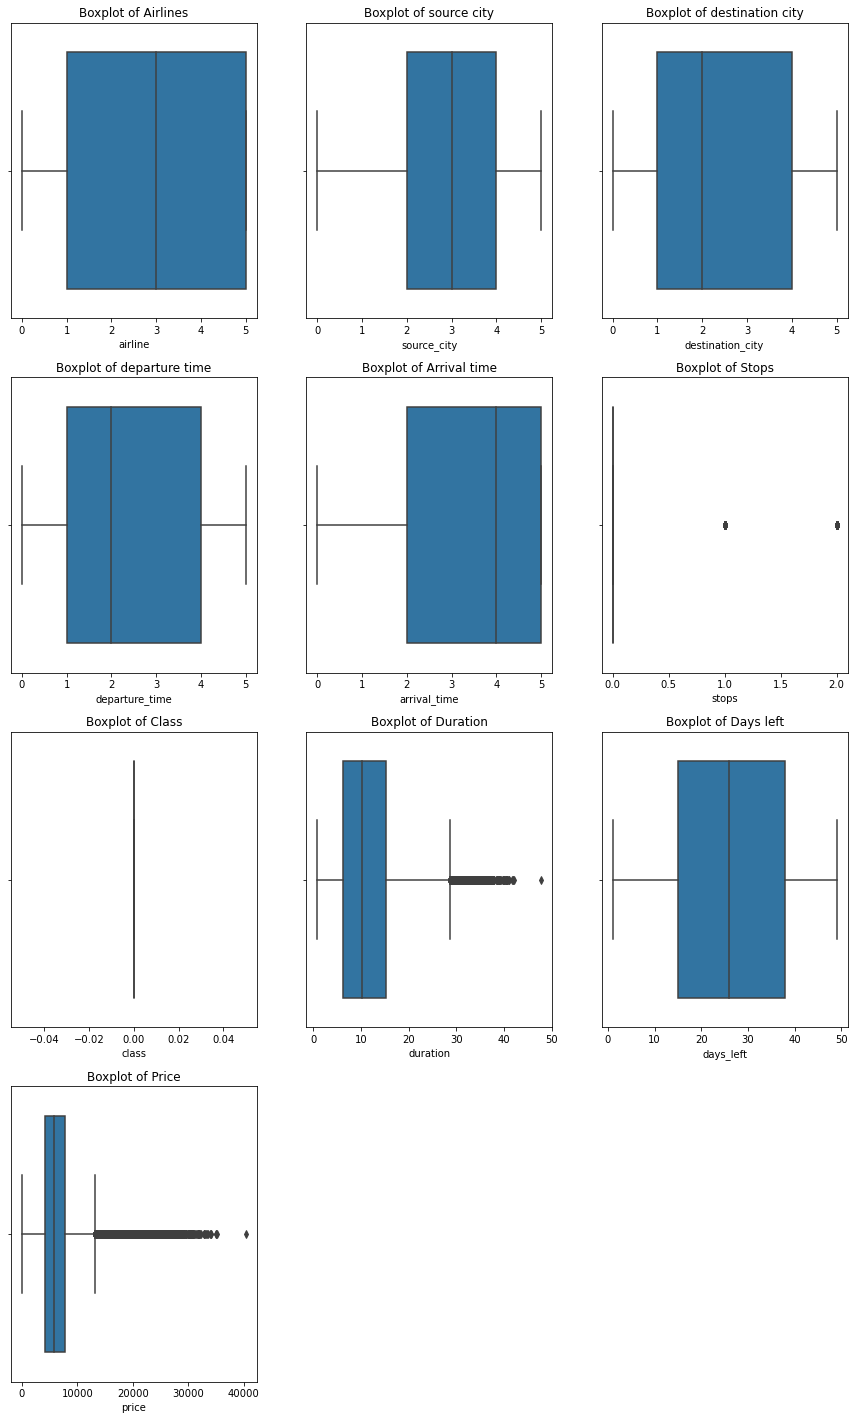

In [38]:
plt.figure(figsize=(15,25))

plt.subplot(4,3,1)
sns.boxplot(x=df['airline'],data=df)
plt.title('Boxplot of Airlines')

plt.subplot(4,3,2)
sns.boxplot(x=df['source_city'],data=df)
plt.title('Boxplot of source city')

plt.subplot(4,3,3)
sns.boxplot(x=df['destination_city'],data=df)
plt.title('Boxplot of destination city')

plt.subplot(4,3,4)
sns.boxplot(x=df['departure_time'],data=df)
plt.title('Boxplot of departure time')

plt.subplot(4,3,5)
sns.boxplot(x=df['arrival_time'],data=df)
plt.title('Boxplot of Arrival time')

plt.subplot(4,3,6)
sns.boxplot(x=df['stops'],data=df)
plt.title('Boxplot of Stops')

plt.subplot(4,3,7)
sns.boxplot(x=df['class'],data=df)
plt.title('Boxplot of Class')

plt.subplot(4,3,8)
sns.boxplot(x=df['duration'],data=df)
plt.title('Boxplot of Duration')

plt.subplot(4,3,9)
sns.boxplot(x=df['days_left'],data=df)
plt.title('Boxplot of Days left')

plt.subplot(4,3,10)
sns.boxplot(x=df['price'],data=df)
plt.title('Boxplot of Price')


plt.show()


# FEATURE SELECTION:

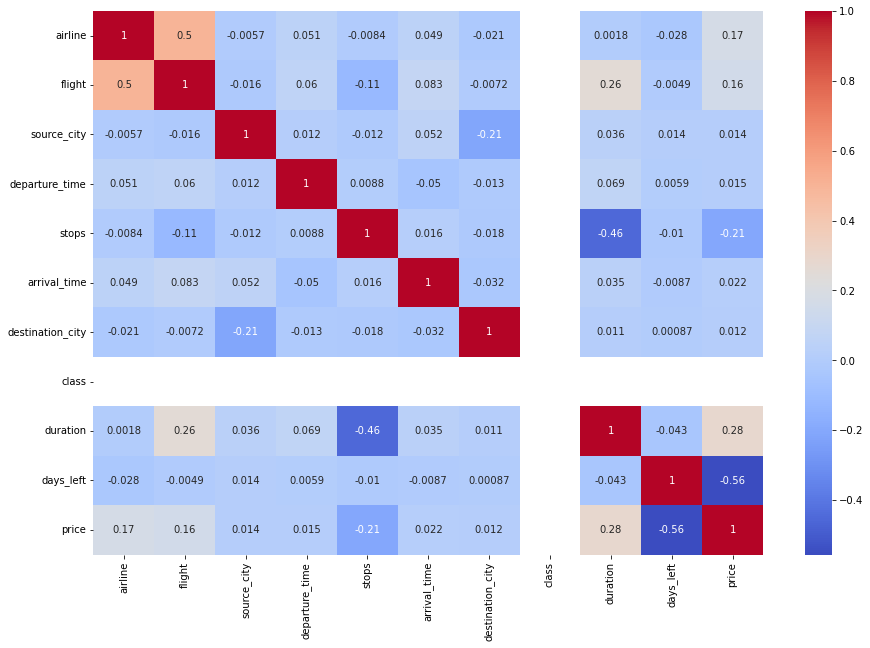

In [39]:
#heatmap:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

These are the following observations from the correlation graph:
1. positive correlation between airline and flight:0.64 
2. positive correlation between stops and duration:0.47
3. strong negative correlation between class and price:-0.94
 
which means there is multicollinearity  

# Selecting the features using VIF. VIF should be less than 5. 

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype !='object') & (col != 'price') ):
        col_list.append(col)
        
x = df[col_list] 
vif_data = pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


            feature       VIF
0           airline  4.846979
1            flight  8.553642
2       source_city  3.161760
3    departure_time  2.672514
4             stops  1.435735
5      arrival_time  3.668804
6  destination_city  2.776236
7             class       NaN
8          duration  4.406675
9         days_left  3.862376


From above we can notice that all the features are having vif < 5 except flight so we drop flight

Dropping the flight column. All features are having VIF less than 5. 

In [41]:
df=df.drop(columns=['flight'],axis=1)

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype !='object') & (col != 'price') ):
        col_list.append(col)
        
x = df[col_list] 
vif_data = pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)
#vif threshold can be 5,6or7. It depends on our dataset

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


            feature       VIF
0           airline  3.237984
1       source_city  3.148233
2    departure_time  2.653652
3             stops  1.426612
4      arrival_time  3.586363
5  destination_city  2.747195
6             class       NaN
7          duration  3.799511
8         days_left  3.784716


From above we can say that only 9 features out of 10 are enough but stops column also has correlation as we can notice from the heatmap so moving further we will remove that too. Thus, we select 8 features.

From above we can say that 8 features are enough we can remove stops too as it shows correlation 

In [43]:
df=df.drop(columns=['stops'],axis=1)

# Standardizing the dataset:

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # to standardise the dataset since min max values etc have a huge difference in their values

# 1. Linear Regression Model to predict the price of the flights:

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [46]:
x=df.iloc[:,:-1]
y=df['price']

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [48]:
x_train=scaler.fit_transform(x_train) #standardization
x_test=scaler.fit_transform(x_test)

In [49]:
x_train.shape

(147218, 8)

In [50]:
x_test.shape

(36805, 8)

In [51]:
lr=LinearRegression()

In [52]:
lr.fit(x_train,y_train)

LinearRegression()

In [53]:
y_pred=lr.predict(x_test)

In [54]:
y_pred

array([ 5412.53798924,  4272.95556509,  8753.52758328, ...,
        3846.53596892, 11140.57164043, 10377.70149955])

In [55]:
difference=pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual_value','Predicted_value'])
difference

,Actual_value,Predicted_value
0,5668.0,5412.537989
1,2447.0,4272.955565
2,10069.0,8753.527583
3,6067.0,9010.299382
4,6329.0,6891.162647
...,...,...
36800,7173.0,7076.559476
36801,9879.0,10051.870846
36802,3393.0,3846.535969
36803,12197.0,11140.571640


# Calculating r2 score,MSE, RMSE.


In [56]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error

In [57]:
print('r2_score is : ',r2_score(y_test,y_pred))
print('Mean squared error is : ', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score is :  0.3952163420846099
Mean squared error is :  8317343.337933792
Root mean squared error is : 2883.9804676754993


# Plotting the graph of actual and predicted price of flight for Linear model

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


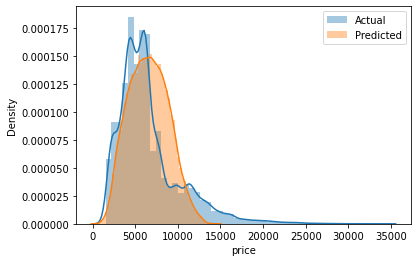

In [58]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
plt.show()

# 2. DECISION TREE REGRESSOR:

In [59]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
dt=DecisionTreeRegressor()

In [61]:
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [62]:
print('r2_score is : ',r2_score(y_test,y_pred))
print('Mean squared error is : ', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score is :  0.7426902351055545
Mean squared error is :  3538676.4024128662
Root mean squared error is : 1881.1369972473738


In [63]:
#PLotting the graph of actual and predicted price of flight for Decisiontree model

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


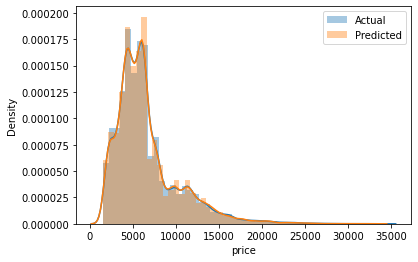

In [64]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
plt.show()

# 3. RANDOM FOREST REGRESSOR:

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rfc = RandomForestRegressor()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [67]:
print('r2_score is : ',r2_score(y_test,y_pred))
print('Mean squared error is : ', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score is :  0.8426073651366117
Mean squared error is :  2164556.806202577
Root mean squared error is : 1471.24328586491


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


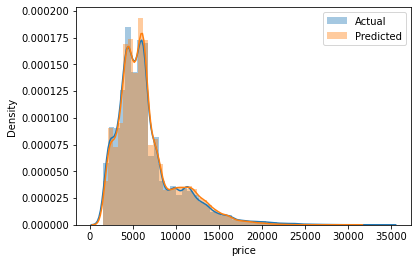

In [68]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
plt.show()